#Importing Libraries

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  #for data analysis
import seaborn as sns  # used for creating more visually appealing and informative statistical graphics.
import matplotlib.pyplot as xmpltlb # for convenience when using its functions
import matplotlib.ticker as mtick

from sklearn import preprocessing #used to Import the Scikit-Learn preprocessing module for data preprocessing tasks.
from sklearn.preprocessing import (StandardScaler,LabelEncoder, MinMaxScaler)


from sklearn import metrics # used to Import the metrics module from scikit-learn for various evaluation metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #import accuracy, precision, recall, and F1-score metrics from Scikit-Learn for evaluating machine learning models.
from sklearn.metrics import classification_report #used to Import specific metrics functions from Scikit-Learn forgenerating classification reports.
from sklearn.metrics import confusion_matrix # used to Import the confusion_matrix function from Scikit-Learn for creating confusion matrices.
from sklearn.metrics import roc_curve, auc, roc_auc_score #used to Import functions for ROC curve analysis and AUC calculation.

#imports the train_test_split function from the scikit-learn (sklearn) library, which is commonly used for splitting datasets
#into training and testing subsets for machine learning.
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE#imports the SMOTE (Synthetic Minority Over-sampling Technique) oversampling method from the imbalanced-learn (imblearn) library

from sklearn.model_selection import RandomizedSearchCV#mports the RandomizedSearchCV class from scikit-learn (sklearn), which is used for performing hyperparameter tuning using randomized search in machine learning models.
from xgboost import XGBClassifier #imports the XGBClassifier class from the XGBoost library, which is used for building gradient boosting machine learning models for classification tasks.
from sklearn.tree import DecisionTreeClassifier #mports the DecisionTreeClassifier class from scikit-learn (sklearn), which is used for building decision tree-based classification models in machine learning.
from sklearn.ensemble import ExtraTreesClassifier #imports the ExtraTreesClassifier class from scikit-learn (sklearn), which is used to create an ensemble of extremely randomized decision trees for classification tasks in machine learning.

# imports the VotingClassifier class from scikit-learn (sklearn), which is used to create an ensemble model that
# combines the predictions of multiple individual classifiers through a voting mechanism for classification tasks in machine learning.
from sklearn.ensemble import VotingClassifier

from random import randint #imports the randint function from the Python random module, which is used to generate random integers.
from scipy.stats import uniform as sp_randa_taloat #imports the uniform distribution from the scipy.stats module and assigns it an alias "sp_randa_taloat,"
from scipy.stats import randint as sp_randInt # imports the randint distribution from the scipy.stats module and assigns it an alias "sp_randInt,"

#mports the Python warnings module, which allows you to handle warning messages and control how they are displayed in your code.
import warnings
warnings.filterwarnings('ignore')

import os

#Loading the Dataset

In [ ]:
#used to reads a CSV file located at the specified path and stores it as a DataFrame named da_ta using the Pandas library.
da_ta = pd.read_csv('/content/drive/MyDrive/Krishna (Churning Analysis)/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Analyzing Dataset

In [ ]:
# checking the first 5 rows of the column
da_ta.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
da_ta.info()# used to provides information about the DataFrame da_ta, including the data types and non-null counts of its columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
da_ta.nunique()# checking how many uniques values present in the column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

####Checking null values

In [ ]:
# Checking for missing values
da_ta.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# used to generates descriptive statistics for the numeric columns in the DataFrame da_ta, providing summary statistics such as mean,
# standard deviation, minimum, and maximum values for each numerical feature.
da_ta.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


####Converting TotalCharges column from categorical to numerical

In [ ]:
# converting data type of the column TotalCharges from object to numeric
da_ta['TotalCharges'] = pd.to_numeric(da_ta['TotalCharges'], errors='coerce')

####Checking missing values

In [ ]:
# Checking for missing values
da_ta.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

####Filling null values of TotalCharges column with median

In [ ]:
# Fill with median
da_ta['TotalCharges'].fillna(da_ta['TotalCharges'].median(), inplace=True)

####Droping unnecessary column

In [ ]:
# Dropping the 'customerID' column from the dataset
da_ta.drop(['customerID',],axis = 1,inplace = True)

#Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

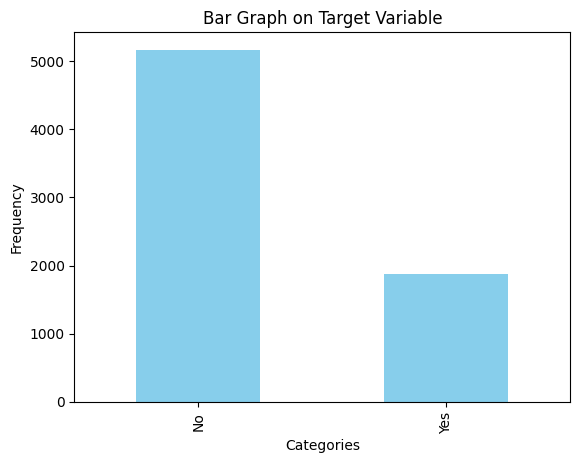

In [ ]:
# Count the frequency of each category in the target variable
frequency = da_ta['Churn'].value_counts()
# Create bar plot
frequency.plot(kind='bar', color='skyblue')
# Set title for the plot
xmpltlb.title('Bar Graph on Target Variable')
# Set label for x-axis
xmpltlb.xlabel('Categories')
# Set label for y-axis
xmpltlb.ylabel('Frequency')

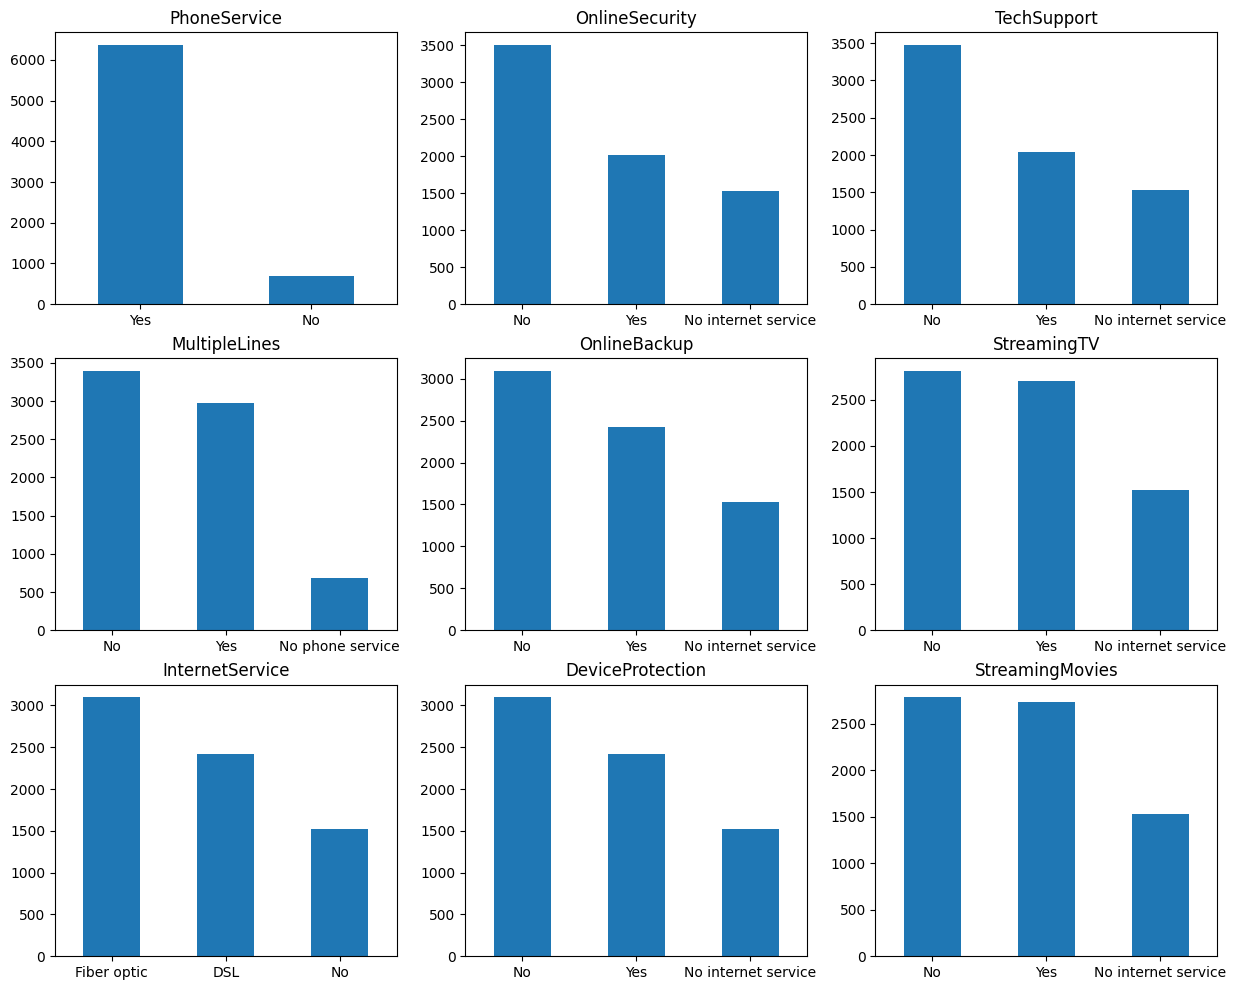

In [ ]:
# @title
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Create a 3x3 grid of subplots with a figure size of 15x12
fig, axes = xmpltlb.subplots(nrows = 3,ncols = 3,figsize = (15,12))

# Iterate over the services list and plot the bar graph for each service
for i, item in enumerate(services):
    if i < 3:
        ax = da_ta[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = da_ta[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = da_ta[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)

    # Set title for each subplot
    ax.set_title(item)

#Data Preprocessing

In [ ]:
# Import the LabelEncoder class from the preprocessing module
LabeL_En_CodeR = preprocessing.LabelEncoder()
# Encode the 'gender' column
da_ta['gender']= LabeL_En_CodeR.fit_transform(da_ta['gender'])
# Encode the 'Partner' column
da_ta['Partner']= LabeL_En_CodeR.fit_transform(da_ta['Partner'])
# Encode the 'Dependents' column
da_ta['Dependents']= LabeL_En_CodeR.fit_transform(da_ta['Dependents'])
# Encode the 'PhoneService' column
da_ta['PhoneService']= LabeL_En_CodeR.fit_transform(da_ta['PhoneService'])
# Encode the 'MultipleLines' column
da_ta['MultipleLines']= LabeL_En_CodeR.fit_transform(da_ta['MultipleLines'])
# Encode the 'InternetService' column
da_ta['InternetService']= LabeL_En_CodeR.fit_transform(da_ta['InternetService'])
# Encode the 'OnlineSecurity' column
da_ta['OnlineSecurity']= LabeL_En_CodeR.fit_transform(da_ta['OnlineSecurity'])
# Encode the 'OnlineBackup' column
da_ta['OnlineBackup']= LabeL_En_CodeR.fit_transform(da_ta['OnlineBackup'])
# Encode the 'DeviceProtection' column
da_ta['DeviceProtection']= LabeL_En_CodeR.fit_transform(da_ta['DeviceProtection'])
# Encode the 'TechSupport' column
da_ta['TechSupport']= LabeL_En_CodeR.fit_transform(da_ta['TechSupport'])
# Encode the 'StreamingTV' column
da_ta['StreamingTV']= LabeL_En_CodeR.fit_transform(da_ta['StreamingTV'])
# Encode the 'StreamingMovies' column
da_ta['StreamingMovies']= LabeL_En_CodeR.fit_transform(da_ta['StreamingMovies'])
# Encode the 'Contract' column
da_ta['Contract']= LabeL_En_CodeR.fit_transform(da_ta['Contract'])
# Encode the 'PaperlessBilling' column
da_ta['PaperlessBilling']= LabeL_En_CodeR.fit_transform(da_ta['PaperlessBilling'])
# Encode the 'PaymentMethod' column
da_ta['PaymentMethod']= LabeL_En_CodeR.fit_transform(da_ta['PaymentMethod'])
# Encode the 'Churn' column
da_ta['Churn']= LabeL_En_CodeR.fit_transform(da_ta['Churn'])

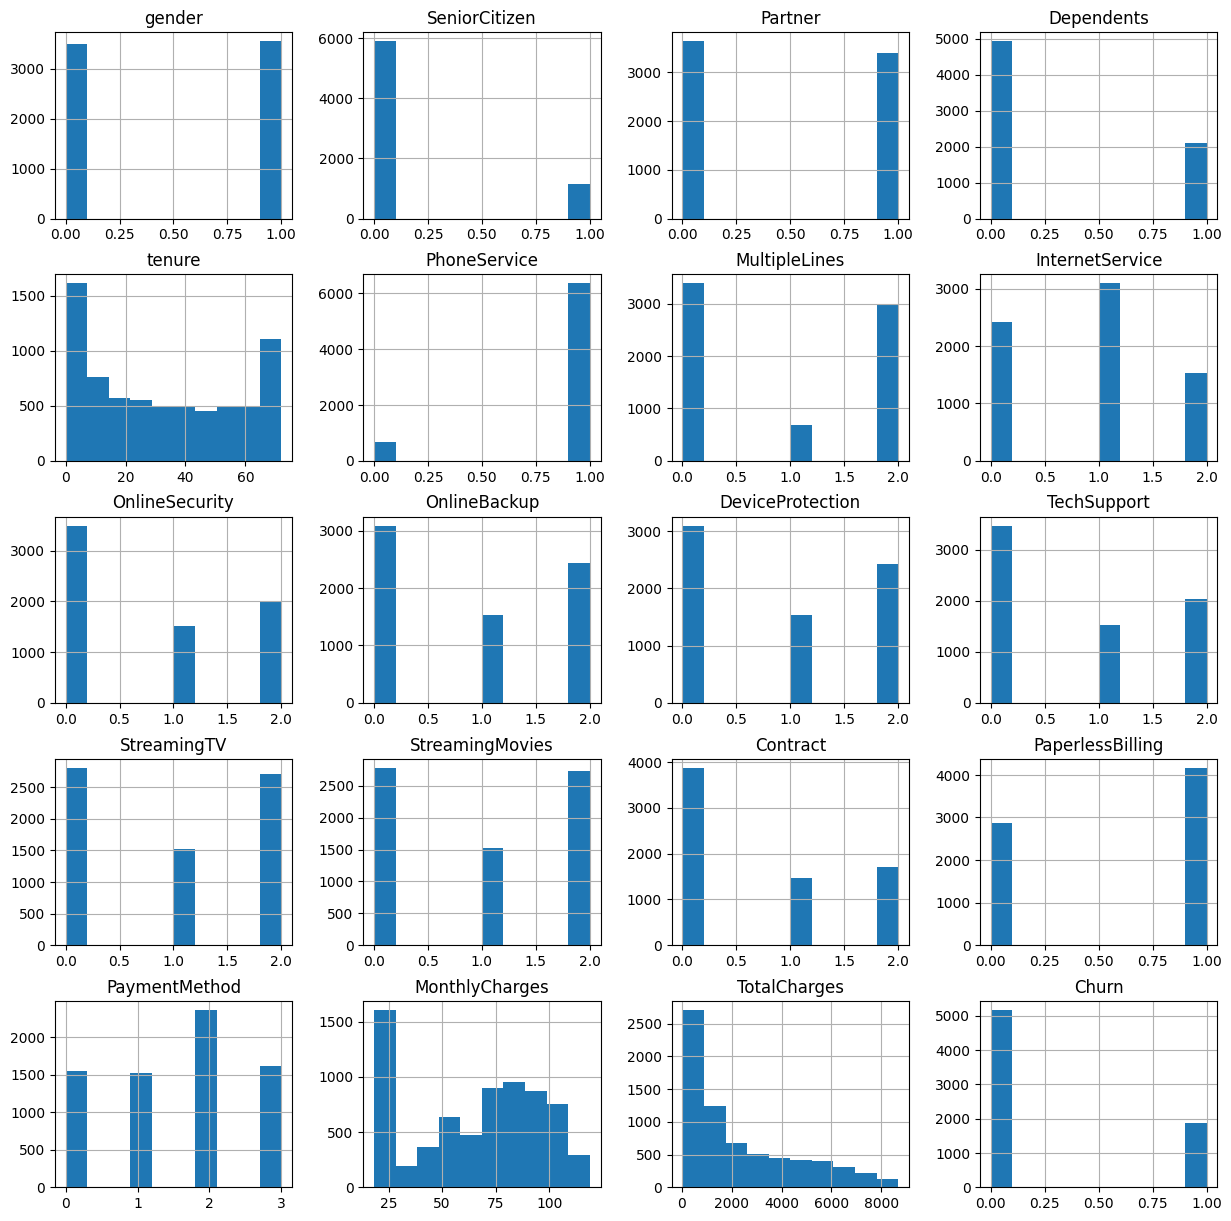

In [ ]:
#plotting histogram
da_ta.hist(figsize = (15,15))
xmpltlb.show()

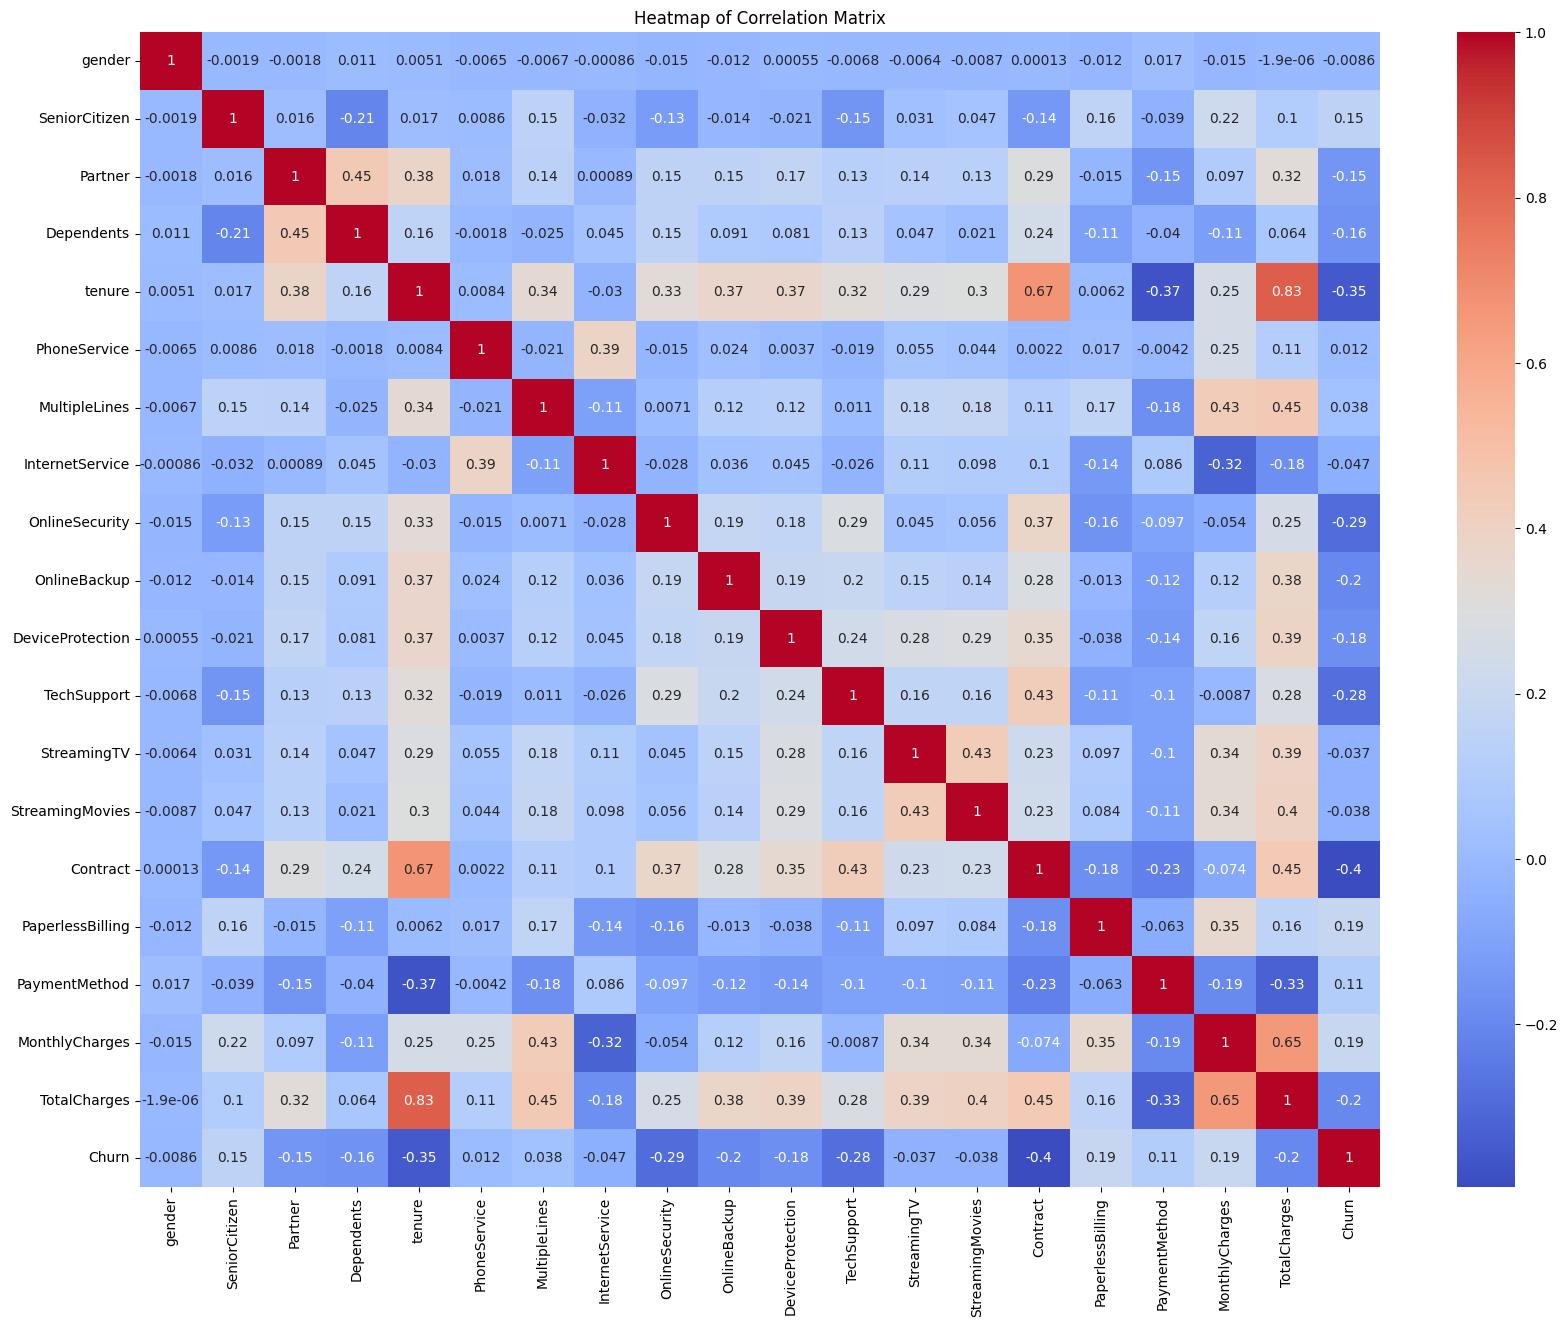

In [ ]:
# Set the figure size
xmpltlb.figure(figsize=(20,15))

# Plotting the correlation matrix using heatmap
sns.heatmap(da_ta.corr(), annot=True, cmap='coolwarm')

# Setting the title of the plot
xmpltlb.title('Heatmap of Correlation Matrix')

# Display the plot
xmpltlb.show()

###Applying Standard Scaler

In [ ]:
# Creating the instance of the StandardScaler class
scale = StandardScaler()

# Fit the scale to the data, excluding the 'Churn' column
scale.fit(da_ta.drop(['Churn'],axis = 1))

# Transform the data using the scale, excluding the 'Churn' column
scaled_features = scale.transform(da_ta.drop('Churn',axis = 1))

###Assigning X and Y

In [ ]:
# Assign the standardized features to X
X = scaled_features

# Assign the 'Churn' column to Y
Y = da_ta['Churn']

###Applying Smote to balance target class

In [ ]:
#Using Smote to balanced the data cause we have unbalanced values in target column
# Create an instance of the SMOTE class with a random state of 42
smote = SMOTE(random_state=42)

# Resampling the data using SMOTE
X_resam_pled, y_resam_pled = smote.fit_resample(X, Y)

###Plotting target variable after Smote

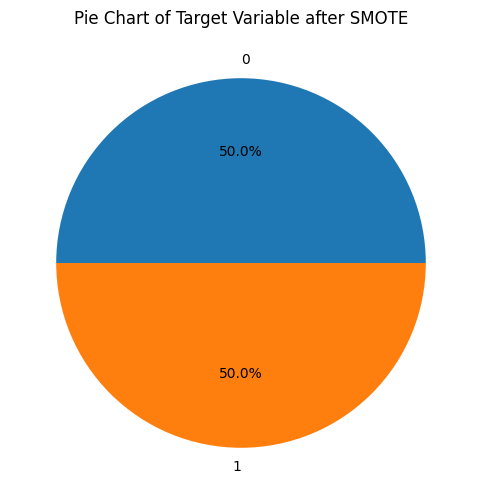

In [ ]:
# Create a Pandas series with the resampled target variable
y_cou_nts = pd.Series(y_resam_pled).value_counts()

# Set the figure size
xmpltlb.figure(figsize=(10,6))

# Plot the pie chart
xmpltlb.pie(y_cou_nts, labels = y_cou_nts.index, autopct='%1.1f%%')

# Set the title of the plot
xmpltlb.title('Pie Chart of Target Variable after SMOTE')

# Display the plot
xmpltlb.show()

#Splitting dataset into data

In [ ]:
# Splitting the data into two parts first is training data which is seventy percent of original data and second is testing data which is 30 percent of original data
X_tra_in,X_te_st,Y_tra_in,Y_te_st = train_test_split(X_resam_pled, y_resam_pled ,test_size = 0.3,random_state=44)

#Prediction Using XGBoost Classifier

The model presented is a classification model that makes use of the XGBoost method and is optimized via RandomizedSearchCV. Extreme Gradient Boosting, or XGBoost, is a potent gradient boosting ensemble method renowned for its exceptional predictive precision.

The following hyperparameters are being adjusted:

'n_estimators': This option indicates how many decision trees or boosting rounds are used in the ensemble. It is configured to search between 100, 500, 1000, and 2000 among other values. A more accurate model could result from more trees, but overfitting should be carefully monitored to avoid this.


"max_depth": The maximum depth of each decision tree in the ensemble is set by this parameter. It's being investigated in the intervals of 3, 6, 9, and 12. Trees can detect more intricate associations in the data when the'max_depth' is higher, but this also raises the possibility of overfitting.

'learning_rate': In order to minimize the loss function, the learning rate is a crucial hyperparameter that regulates the step size at each iteration while lowering the gradient. There are other learning rates being studied, including 0.01, 0.03, 0.05, and 0.1.


By dividing the training data into ten subsets and training the model on nine of them while validating on the remaining one, the RandomizedSearchCV carries out 10-fold cross-validation. Every subset is utilized as a validation set once during the ten repetitions of this process. It aids in evaluating how effectively the model extrapolates to unknown data.


Finding the ideal hyperparameter combination inside the given search space is the main goal of RandomizedSearchCV, which aims to determine the configuration that produces the highest predictive performance.

An XGBoost classifier that has been greatly optimized is the result of this procedure. With consideration for the trade-offs between tree number, tree depth, and learning rate, it has been fine-tuned to perform remarkably well on the particular training dataset. By avoiding overfitting, this fine-tuning makes sure the model is more appropriate for producing precise predictions for the specified classification task. Cross-validation is used to further verify the model's efficacy and provide a reliable evaluation of its performance.

In [ ]:
# Defining the parameters values that should be searched for parameter tuning
par_am_gr_id = {'n_estimators': [100, 500, 1000, 2000],
              'max_depth': [3, 6, 9, 12],
              'learning_rate': [0.01, 0.03, 0.05, 0.1]}

# Instantiate an instance of the XGBClassifier class
xgb = XGBClassifier()

# Instantiate an instance of the RandomizedSearchCV class with the XGBClassifier instance and parameter grid as arguments
xgbc = RandomizedSearchCV(xgb, param_distributions=par_am_gr_id, cv=10)

# Fitting the RandomizedSearchCV instances with the train data
xgbc.fit(X_tra_in, Y_tra_in)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 500, 1000, 2000]})

###Training data report of XGboost Classifier

In [ ]:
#Predicting the X_train on XGboost Classifier
y_pre_dic_ting_tra_in_xg = xgbc.predict(X_tra_in)

In [ ]:
# Calculating various scores in training data report
training_x_accuracy = metrics.accuracy_score(Y_tra_in, y_pre_dic_ting_tra_in_xg)
print(f"Accuracy: {training_x_accuracy}")

# Calculating the precision of the model on the train data.
training_x_precision = precision_score(Y_tra_in, y_pre_dic_ting_tra_in_xg, average='weighted')
print("Precision: ", training_x_precision)

# Calculating the recall of the model on the train data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
training_x_recall = recall_score(Y_tra_in, y_pre_dic_ting_tra_in_xg, average='weighted')
print("Recall: ", training_x_recall)

# Calculating the F1 score of the model on the train data.
training_x_f1 = f1_score(Y_tra_in, y_pre_dic_ting_tra_in_xg, average='weighted')
print("F1 Score: ", training_x_f1)

Accuracy: 0.9794284136407566
Precision:  0.9796790411302854
Recall:  0.9794284136407566
F1 Score:  0.9794250280707925


In [ ]:
# Generate the classification report on the  training data
train_class_report = classification_report(Y_tra_in, y_pre_dic_ting_tra_in_xg)

# Print the classification report for training data
print("Classification Report on Training Data :\n", train_class_report)

Classification Report on Training Data :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3611
           1       0.97      0.99      0.98      3632

    accuracy                           0.98      7243
   macro avg       0.98      0.98      0.98      7243
weighted avg       0.98      0.98      0.98      7243



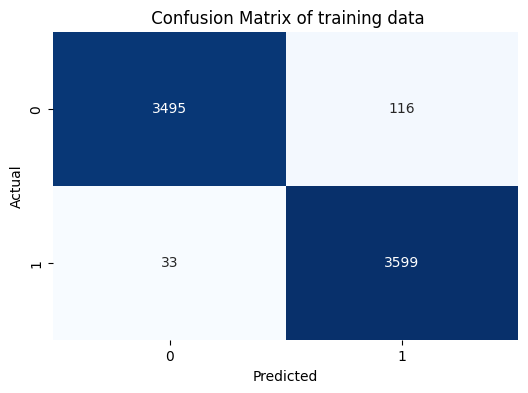

In [ ]:
confusion_mat_train = confusion_matrix(Y_tra_in,y_pre_dic_ting_tra_in_xg)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title(' Confusion Matrix of training data')
# Display the plot
xmpltlb.show()

###Testing data report of XGboost Classifier

In [ ]:
#Predicting the X_te_st on XGboost Classifier
y_pre_dic_ting_te_st_xg = xgbc.predict(X_te_st)

In [ ]:
# Calculate evaluation metrics on testing data
testing_x_accuracy = metrics.accuracy_score(Y_te_st, y_pre_dic_ting_te_st_xg)
print(f"Accuracy: {testing_x_accuracy}")

# Calculating the precision of the model on the training data.
testing_x_precision = precision_score(Y_te_st, y_pre_dic_ting_te_st_xg, average='weighted')
print("Precision: ", testing_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
testing_x_recall = recall_score(Y_te_st, y_pre_dic_ting_te_st_xg, average='weighted')
print("Recall: ", testing_x_recall)

# Calculating the F1 score of the model on the training data.
testing_x_f1 = f1_score(Y_te_st, y_pre_dic_ting_te_st_xg, average='weighted')
print("F1 Score: ", testing_x_f1)

Accuracy: 0.8521739130434782
Precision:  0.8522069783488091
Recall:  0.8521739130434782
F1 Score:  0.8521755076887676


In [ ]:
# Generate the classification report for testing data
class_report = classification_report(Y_te_st, y_pre_dic_ting_te_st_xg)

# Print the classification report
print("Classification Report on Test Data:\n", class_report)

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1563
           1       0.85      0.86      0.85      1542

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



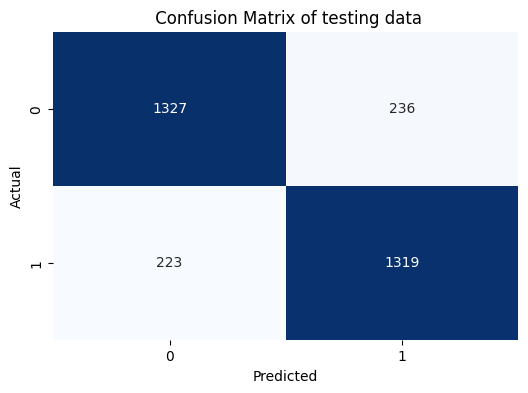

In [ ]:
confusion_mat_test = confusion_matrix(Y_te_st,y_pre_dic_ting_te_st_xg)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title(' Confusion Matrix of testing data')
# Display the plot
xmpltlb.show()


###ROC Curve for testing and training data of XGboost Classifier

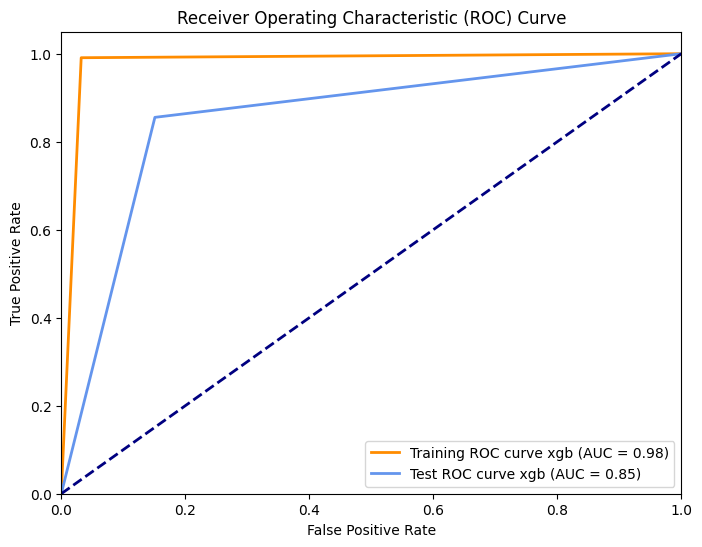

ROC AUC Score for Training Data: 0.98
ROC AUC Score for Test Data: 0.85


In [ ]:
# Compute ROC curve and AUC for train data
fpr_train, tpr_train, _ = roc_curve(Y_tra_in, y_pre_dic_ting_tra_in_xg)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test data
fpr_test, tpr_test, _ = roc_curve(Y_te_st, y_pre_dic_ting_te_st_xg)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC AUC score for training and test data
# The ROC AUC score is a single number summary of the classifier performance
roc_auc_score_train = roc_auc_score(Y_tra_in, y_pre_dic_ting_tra_in_xg)
roc_auc_score_test = roc_auc_score(Y_te_st, y_pre_dic_ting_te_st_xg)

# Plot ROC curve for training and test data
# The ROC curve is a graphical representation of the trade off between the true positive rate and false positive rate for every possible cut off
xmpltlb.figure(figsize=(8, 6))
xmpltlb.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve xgb (AUC = {roc_auc_train:.2f})')
xmpltlb.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve xgb (AUC = {roc_auc_test:.2f})')
xmpltlb.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # This is the line representing random guessing
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate') # False positive rate is on x-axis
xmpltlb.ylabel('True Positive Rate') # True positive rate is on y-axis
xmpltlb.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
xmpltlb.legend(loc='lower right')
xmpltlb.show()

# Print ROC AUC scores for training and test data
# These are the final results we are interested in. They tell us how well our classifier is doing.
print(f"ROC AUC Score for Training Data: {roc_auc_score_train:.2f}")
print(f"ROC AUC Score for Test Data: {roc_auc_score_test:.2f}")

#Prediction Using Extra Tree Classifier

The described model is an Extra Trees Classifier that has been refined using a RandomizedSearchCV procedure. An ensemble learning algorithm called Extra Trees (Extremely Randomized Trees) is related to Random Forest and is renowned for its strength and accuracy.

These hyperparameters are under investigation:

The number of decision trees in the ensemble is specified by the parameter "n_estimators." In steps of 200, it goes from 200 to 2000. While more trees can improve the robustness and accuracy of the model, overfitting must be carefully managed.

"max_features": This variable indicates the most features that each tree's split decisions can take into account. 'auto' takes into account all features, while'sqrt' takes into account the square root of all features. The diversity and randomness of the trees are impacted by this parameter.


The'max_depth' parameter determines the maximum depth of a tree, with 11 different levels ranging from 10 to 110, and a 'None' option for unrestricted growth. The intricacy and ability to capture intricate relationships in the data are impacted by the tree depth.


'min_samples_split': It provides two, five, and ten options for the minimum number of samples needed to split an internal node. Finer splits are possible with a smaller value, but overfitting could occur with a larger value.

"min_samples_leaf": This parameter, which has the values 1, 2, and 4, determines the bare minimum of samples required for a leaf node. A larger value promotes greater generalization, whereas a smaller value may result in overfitting due to more intricate and detailed trees.

"bootstrap": This is a binary option that determines if training samples from bootstrap collections are used or not. 'False' indicates that bootstrapping is not possible, whereas 'True' permits it.


Using a 10-fold cross-validation approach, RandomizedSearchCV is used to evaluate various combinations of these hyperparameters. Ten subsets of the training data are repeatedly divided into them, the model is trained on nine of them, and the remaining one is validated. This procedure aids in assessing the model's generalizability to previously undiscovered data.


Finding the ideal hyperparameter combination within the predefined search space is the main goal of RandomizedSearchCV, which finally chooses the configuration that provides the best predictive performance.

An Extra Trees Classifier that is highly optimized for your particular dataset is the end product. To provide reliable and accurate predictions for the specified classification task, it strikes a balance between the trade-offs between tree depth, number of trees, and other hyperparameters. Through cross-validation, the model's efficacy is thoroughly evaluated, guaranteeing its dependability in practical applications.

In [ ]:
# @title
# Define the values for the hyperparameters that should be searched
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Define the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Instantiate an instance of the ExtraTreesClassifier class
et = ExtraTreesClassifier()

# Instantiate an instance of the RandomizedSearchCV class with the ExtraTreesClassifier instance and parameter grid as arguments
et = RandomizedSearchCV(et, param_distributions=param_grid, cv=10)

# Fit the RandomizedSearchCV instance with the training data
et.fit(X_tra_in, Y_tra_in)

RandomizedSearchCV(cv=10, estimator=ExtraTreesClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

###Training data report of Extra tree classifier

In [ ]:
#Prediction on X_train using Extra tree classifier
y_pre_dic_ting_tra_in_et = et.predict(X_tra_in)

In [ ]:
# Calculate evaluation metrics
training_x_accuracy = metrics.accuracy_score(Y_tra_in, y_pre_dic_ting_tra_in_et)
print(f"Accuracy: {training_x_accuracy}")

# Calculating the precision of the model on the train data.
training_x_precision = precision_score(Y_tra_in, y_pre_dic_ting_tra_in_et, average='weighted')
print("Precision: ", training_x_precision)

# Calculating the recall of the model on the train data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
training_x_recall = recall_score(Y_tra_in, y_pre_dic_ting_tra_in_et, average='weighted')
print("Recall: ", training_x_recall)

# Calculating the F1 score of the model on the train data.
training_x_f1 = f1_score(Y_tra_in, y_pre_dic_ting_tra_in_et, average='weighted')
print("F1 Score: ", training_x_f1)

Accuracy: 0.9874361452436835
Precision:  0.9874555761442161
Recall:  0.9874361452436835
F1 Score:  0.9874359028716667


In [ ]:
# Generate the classification report for train data
train_class_report = classification_report(Y_tra_in, y_pre_dic_ting_tra_in_et)

# Print the classification report for training data
print("Classification Report on Training Data :\n", train_class_report)

Classification Report on Training Data :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3611
           1       0.98      0.99      0.99      3632

    accuracy                           0.99      7243
   macro avg       0.99      0.99      0.99      7243
weighted avg       0.99      0.99      0.99      7243



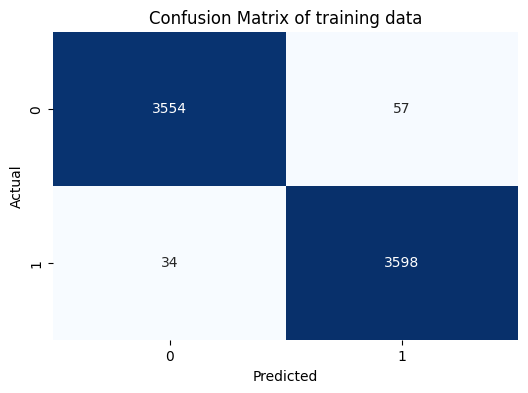

In [ ]:
confusion_mat_train = confusion_matrix(Y_tra_in,y_pre_dic_ting_tra_in_et)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title('Confusion Matrix of training data')
# Display the plot
xmpltlb.show()

###Testing data report of Extra tree classifier

In [ ]:
#prediction on X_test using Extra tree classifier
y_pre_dic_ting_te_st_et = et.predict(X_te_st)

In [ ]:
# Calculate evaluation metrics on testing data
testing_x_accuracy = metrics.accuracy_score(Y_te_st, y_pre_dic_ting_te_st_et)
print(f"Accuracy: {testing_x_accuracy}")

# Calculating the precision of the model on the training data.
testing_x_precision = precision_score(Y_te_st, y_pre_dic_ting_te_st_et, average='weighted')
print("Precision: ", testing_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
testing_x_recall = recall_score(Y_te_st, y_pre_dic_ting_te_st_et, average='weighted')
print("Recall: ", testing_x_recall)

# Calculating the F1 score of the model on the training data.
testing_x_f1 = f1_score(Y_te_st, y_pre_dic_ting_te_st_et, average='weighted')
print("F1 Score: ", testing_x_f1)

Accuracy: 0.8605475040257649
Precision:  0.8611802188210153
Recall:  0.8605475040257649
F1 Score:  0.8605092239849663


In [ ]:
# Generate the classification report for testing data
class_report = classification_report(Y_te_st, y_pre_dic_ting_te_st_et)

# Print the classification report
print("Classification Report on Test Data:\n", class_report)

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1563
           1       0.85      0.88      0.86      1542

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



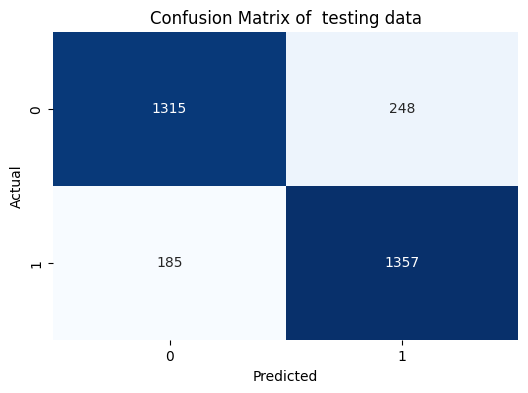

In [ ]:
confusion_mat_test = confusion_matrix(Y_te_st,y_pre_dic_ting_te_st_et)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title('Confusion Matrix of  testing data')
# Display the plot
xmpltlb.show()

###ROC Curve for teating and training data of Extra tree classifier

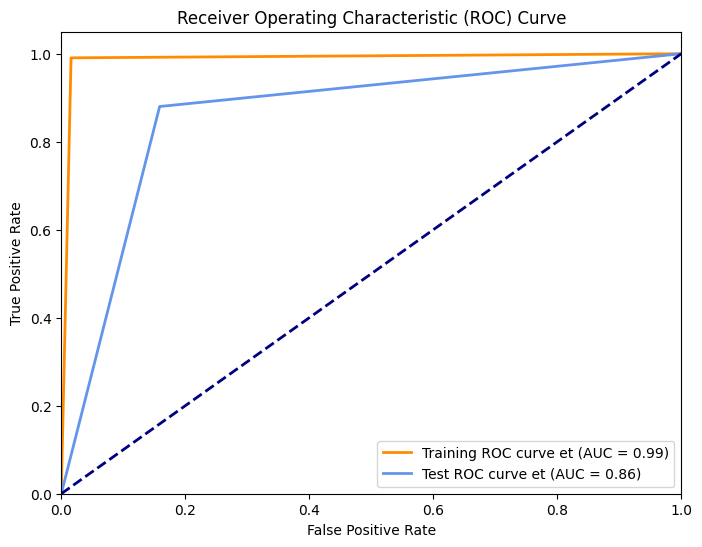

ROC AUC Score for Training Data: 0.99
ROC AUC Score for Test Data: 0.86


In [ ]:
# Compute ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(Y_tra_in, y_pre_dic_ting_tra_in_et)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test data
fpr_test, tpr_test, _ = roc_curve(Y_te_st, y_pre_dic_ting_te_st_et)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC AUC score for training and test data
# The ROC AUC score is a single number summary of the classifier performance
roc_auc_score_train = roc_auc_score(Y_tra_in, y_pre_dic_ting_tra_in_et)
roc_auc_score_test = roc_auc_score(Y_te_st, y_pre_dic_ting_te_st_et)

# Plot ROC curve for training and test data
# The ROC curve is a graphical representation of the trade off between the true positive rate and false positive rate for every possible cut off
xmpltlb.figure(figsize=(8, 6))
xmpltlb.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve et (AUC = {roc_auc_train:.2f})')
xmpltlb.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve et (AUC = {roc_auc_test:.2f})')
xmpltlb.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # This is the line representing random guessing
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate') # False positive rate is on x-axis
xmpltlb.ylabel('True Positive Rate') # True positive rate is on y-axis
xmpltlb.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
xmpltlb.legend(loc='lower right')
xmpltlb.show()

# Print ROC AUC scores for training and test data
# These are the final results we are interested in. They tell us how well our classifier is doing.
print(f"ROC AUC Score for Training Data: {roc_auc_score_train:.2f}")
print(f"ROC AUC Score for Test Data: {roc_auc_score_test:.2f}")

#Prediction Using Voting Classifier (xgboost, decision tree, and extra tree classifier)

####Defining Decision Tree Model (Uses in Voting Classifier)

Using RandomizedSearchCV, this Decision Tree Classifier model underwent hyperparameter optimization. For classification tasks, decision trees are a basic and comprehensible machine learning technique.

The main hyperparameters being adjusted are as follows:

'max_depth': This parameter sets the decision tree's maximum depth. A range of values are examined, including 3, 4, 5, 6, 9, and 'None.' The maximum depth affects the tree's complexity; deeper trees may be able to capture complex relationships in the data, but they run the risk of being overfit.

The maximum number of features to take into account when making split decisions at each node is specified by the'max_features' parameter. Values between one and nine are tested. The diversity of the decisions made by the tree can be influenced by feature selection.


The parameter'min_samples_leaf' determines the bare minimum of samples needed to form a leaf node. It ranges from 1 to 9, which affects how specific the tree decides what to do.

"criterion": It establishes the standard by which a split's quality is evaluated. 'gini' and 'entropy,' the two choices, measure impurity in different ways. Every node's decision-making process is impacted by the criterion.


By using a 5-fold cross-validation strategy, RandomizedSearchCV splits the training dataset into five subsets. This process is repeated five times, with the model being trained on four of them and validated on the fifth. This cross-validation technique offers a more thorough assessment of the model's performance and aids in determining how well it generalizes to new data.


Finding the ideal hyperparameter combination within the specified search space is the main goal of RandomizedSearchCV. It chooses the setup that produces the most accurate predictions.


A highly optimized Decision Tree Classifier that is especially suited to the training dataset is the end product. By preventing overfitting, this optimization guarantees that the model generates precise predictions for the specified classification task. Cross-validation is used to further validate the model's efficacy, guaranteeing its dependability and generalizability for use in practical settings.

In [ ]:
# @title
# Define the parameter values that should be searched
param_dist = {"max_depth": [3,4,5,6,9, None],
              "max_features": list(range(1, 10)),
              "min_samples_leaf": list(range(1, 10)),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: dt
dt = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
dt.fit(X_tra_in, Y_tra_in)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 9, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9]})

###Combining the XGboost classifier, Extra tree Classifier, and Decision tree

To create collective predictions, this ensemble combines three distinct base classifiers. Let's dissect this procedure in detail:

Base Classifiers: There are three base classifiers in the ensemble model:

Decision Tree Classifier (dt): An easily understood and basic classification algorithm is a decision tree. It can learn decision rules that are hierarchical by using the characteristics of the data.

Extra Trees Classifier (et): Although it builds trees in a different way than Random Forest, the Extra Trees Classifier is an ensemble technique. It is renowned for being resilient and capable of handling noisy data.

The XGBoost Classifier (xgbc) is a potent gradient boosting algorithm that consistently produces cutting-edge outcomes in a variety of machine learning contests. It creates predictions by combining several decision trees.

Voting: 'Hard' voting is used when the VotingClassifier is instantiated, and its estimators are the three base classifiers. In hard voting, a majority vote determines the final prediction, with each base classifier making a prediction. The ensemble predicts a class based on which the base classifiers assign the greatest number of votes.

Training: Using the training set (X_train and Y_train), the VotingClassifier is fitted (trained). The same training set of data is used for training each base classifier, and the individual predictions are combined to create a consensus decision.

These are the advantages of employing such an ensemble:

Enhanced Performance: Because ensembles combine the advantages of several classifiers, they frequently outperform individual models in terms of prediction.

Robustness: Because the accurate predictions of several classifiers can compensate for the errors made by a single classifier, ensembles are more resistant to overfitting.

Diverse Viewpoints: Every base classifier could have advantages and disadvantages of its own. By combining them, the ensemble is able to consider various viewpoints on the data.

Reduction of Variance: By assisting in the reduction of prediction variance, ensembles can produce more consistent and trustworthy outcomes.

All things considered, the Voting Classifier makes more reliable and accurate predictions by utilizing the diversity present in the base classifiers. To optimize the advantages of ensemble learning, base classifiers should be selected with a strong and diverse set of values.

In [ ]:
# Combine the classifiers in the ensemble model.
vc = VotingClassifier(estimators=[('dt', dt), ('et', et), ('xgb', xgbc)], voting='hard')

# Fitting the new hybrid model on the training set.
vc.fit(X_tra_in, Y_tra_in)

VotingClassifier(estimators=[('dt',
                              RandomizedSearchCV(cv=5,
                                                 estimator=DecisionTreeClassifier(),
                                                 param_distributions={'criterion': ['gini',
                                                                                    'entropy'],
                                                                      'max_depth': [3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    9,
                                                                                    None],
                                                                      'max_features': [1,
                                                                                       2,
                                                                                       3,
                                                                                       4,
                                                                                       5,
                                                                                       6,
                                                                                       7,
                                                                                       8,
                                                                                       9],
                                                                      'min_samples_leaf': [1,
                                                                                           2,
                                                                                           3,
                                                                                           4,
                                                                                           5,
                                                                                           6,
                                                                                           7,
                                                                                           8,
                                                                                           9]})),
                             ('et',
                              RandomizedSearchCV(cv=10,
                                                 estimator=ExtraTreesClassifier(),
                                                 param_distributions={'bootstrap': [...
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None,
                                                                         random_state=None, ...),
                                                 param_distribution

###Training data report of Voting Classifier

In [ ]:
#prediction on X_train Using Hybrid Model
y_pre_dic_ting_tra_in_vc = vc.predict(X_tra_in)

In [ ]:
# Calculate evaluation metrics
training_x_accuracy = metrics.accuracy_score(Y_tra_in, y_pre_dic_ting_tra_in_vc)
print(f"Accuracy: {training_x_accuracy}")

# Calculating the precision of the model on the training data.
training_x_precision = precision_score(Y_tra_in, y_pre_dic_ting_tra_in_vc, average='weighted')
print("Precision: ", training_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
training_x_recall = recall_score(Y_tra_in, y_pre_dic_ting_tra_in_vc, average='weighted')
print("Recall: ", training_x_recall)

# Calculating the F1 score of the model on the training data.
training_x_f1 = f1_score(Y_tra_in, y_pre_dic_ting_tra_in_vc, average='weighted')
print("F1 Score: ", training_x_f1)

Accuracy: 0.9750103548253486
Precision:  0.9751269276735378
Recall:  0.9750103548253486
F1 Score:  0.9750082367424856


In [ ]:
# Generate the classification report for training data
train_class_report = classification_report(Y_tra_in, y_pre_dic_ting_tra_in_vc)

# Print the classification report for training data
print("Classification Report on Training Data :\n", train_class_report)

Classification Report on Training Data :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3611
           1       0.97      0.98      0.98      3632

    accuracy                           0.98      7243
   macro avg       0.98      0.97      0.98      7243
weighted avg       0.98      0.98      0.98      7243



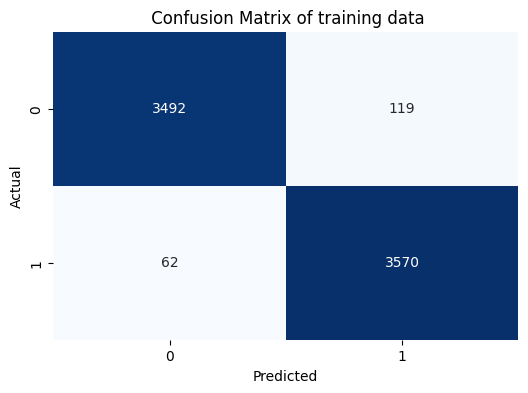

In [ ]:
confusion_mat_train = confusion_matrix(Y_tra_in,y_pre_dic_ting_tra_in_vc)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title(' Confusion Matrix of training data')
# Display the plot
xmpltlb.show()

###Testing Data Report of Voting Classifier

In [ ]:
#Prediction on X_test using Hybrid Model
y_pre_dic_ting_te_st_vc = vc.predict(X_te_st)

In [ ]:
# Calculate evaluation metrics for test data
testing_x_accuracy = metrics.accuracy_score(Y_te_st, y_pre_dic_ting_te_st_vc)
print(f"Accuracy: {testing_x_accuracy}")

# Calculating the precision of the model on the training data.
testing_x_precision = precision_score(Y_te_st, y_pre_dic_ting_te_st_vc, average='weighted')
print("Precision: ", testing_x_precision)

# Calculating the recall of the model on the training data. Recall (Sensitivity) - the ratio of correctly predicted positive observations to all observations in actual class
testing_x_recall = recall_score(Y_te_st, y_pre_dic_ting_te_st_vc, average='weighted')
print("Recall: ", testing_x_recall)

# Calculating the F1 score of the model on the training data.
testing_x_f1 = f1_score(Y_te_st, y_pre_dic_ting_te_st_vc, average='weighted')
print("F1 Score: ", testing_x_f1)

Accuracy: 0.8563607085346215
Precision:  0.8566223958010334
Recall:  0.8563607085346215
F1 Score:  0.856349385055086


In [ ]:
# Generate the classification report for testing data
class_report = classification_report(Y_te_st, y_pre_dic_ting_te_st_vc)

# Print the classification report
print("Classification Report on Test Data:\n", class_report)

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1563
           1       0.85      0.87      0.86      1542

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



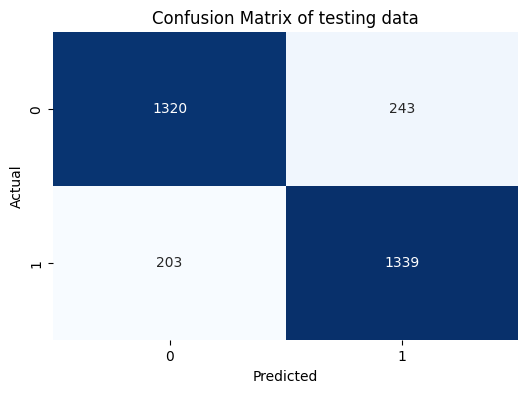

In [ ]:
confusion_mat_test = confusion_matrix(Y_te_st,y_pre_dic_ting_te_st_vc)


#Create a new figure for the heatmap
xmpltlb.figure(figsize=(6, 4))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set the labels for the x and y axes
xmpltlb.xlabel('Predicted')
xmpltlb.ylabel('Actual')
# Set the title for the plot
xmpltlb.title('Confusion Matrix of testing data')
# Display the plot
xmpltlb.show()

###ROC for testing and training data of Voting Classifier

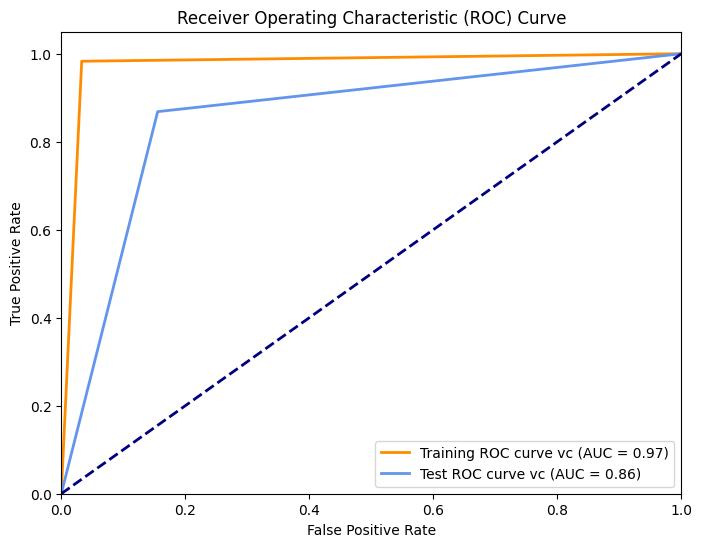

ROC AUC Score for Training Data: 0.97
ROC AUC Score for Test Data: 0.86


In [ ]:
# Compute ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(Y_tra_in, y_pre_dic_ting_tra_in_vc)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test data
fpr_test, tpr_test, _ = roc_curve(Y_te_st, y_pre_dic_ting_te_st_vc)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC AUC score for training and test data
# The ROC AUC score is a single number summary of the classifier performance
roc_auc_score_train = roc_auc_score(Y_tra_in, y_pre_dic_ting_tra_in_vc)
roc_auc_score_test = roc_auc_score(Y_te_st, y_pre_dic_ting_te_st_vc)

# Plot ROC curve for training and test data
# The ROC curve is a graphical representation of the trade off between the true positive rate and false positive rate for every possible cut off
xmpltlb.figure(figsize=(8, 6))
xmpltlb.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve vc (AUC = {roc_auc_train:.2f})')
xmpltlb.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve vc (AUC = {roc_auc_test:.2f})')
xmpltlb.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # This is the line representing random guessing
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate') # False positive rate is on x-axis
xmpltlb.ylabel('True Positive Rate') # True positive rate is on y-axis
xmpltlb.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
xmpltlb.legend(loc='lower right')
xmpltlb.show()

# Print ROC AUC scores for training and test data
# These are the final results we are interested in. They tell us how well our classifier is doing.
print(f"ROC AUC Score for Training Data: {roc_auc_score_train:.2f}")
print(f"ROC AUC Score for Test Data: {roc_auc_score_test:.2f}")